## Logistic regression / classifier

In [2]:
from tqdm import tqdm_notebook
import tensorflow as tf

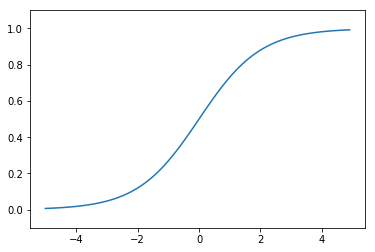

In [4]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 0.5를 기준으로 0.5 보다 크면 합격(1), 작으면 불합격(0)

In [5]:
import tensorflow as tf
tf.set_random_seed(777)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]   # [시간, 출석]
y_data = [[0], [0], [0], [1], [1], [1]]                     # 0 : 불학격, 1 : 합격

X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = 'wieght')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy  = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict = { X : x_data, Y : y_data})
        if step % 200 == 0 or step < 10:
            print("Step : {} \t Cost : {}".format(step, cost_val))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                        feed_dict = { X : x_data, Y : y_data})

Step : 0 	 Cost : 1.7307831048965454
Step : 1 	 Cost : 1.709944248199463
Step : 2 	 Cost : 1.6891757249832153
Step : 3 	 Cost : 1.668479561805725
Step : 4 	 Cost : 1.6478610038757324
Step : 5 	 Cost : 1.6273226737976074
Step : 6 	 Cost : 1.6068668365478516
Step : 7 	 Cost : 1.58649742603302
Step : 8 	 Cost : 1.5662187337875366
Step : 9 	 Cost : 1.5460344552993774
Step : 200 	 Cost : 0.5715118050575256
Step : 400 	 Cost : 0.507413923740387
Step : 600 	 Cost : 0.47182419896125793
Step : 800 	 Cost : 0.447584867477417
Step : 1000 	 Cost : 0.42857101559638977
Step : 1200 	 Cost : 0.41232457756996155
Step : 1400 	 Cost : 0.39775505661964417
Step : 1600 	 Cost : 0.3843378722667694
Step : 1800 	 Cost : 0.37180113792419434
Step : 2000 	 Cost : 0.35999321937561035
Step : 2200 	 Cost : 0.34882214665412903
Step : 2400 	 Cost : 0.3382262885570526
Step : 2600 	 Cost : 0.3281605541706085
Step : 2800 	 Cost : 0.31858906149864197
Step : 3000 	 Cost : 0.3094809353351593
Step : 3200 	 Cost : 0.300808519

In [7]:
print("Hypothesis : \n{h} \n\n Correct (Y) : \n{c} \n\n Accuracy : {a}".format(h = h, c = c, a = a))

Hypothesis : 
[[0.03074028]
 [0.15884677]
 [0.30486736]
 [0.7813819 ]
 [0.93957496]
 [0.9801688 ]] 

 Correct (Y) : 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 

 Accuracy : 1.0


#### clssifying diabetes
#### 예측값이 1이면 당뇨병, 0이면 당뇨병 X

In [9]:
import pandas as pd

df = pd.read_csv("./data/data-03-diabetes.csv", header = None)
print(df.shape)
df.head(10)

# 8 컬럼이 질병 여부

(759, 9)


,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
5,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
6,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333,0
7,0.176471,0.155779,0.000000,0.000000,0.000000,0.052161,-0.952178,-0.733333,1
8,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667,0
9,-0.058824,0.256281,0.573770,0.000000,0.000000,0.000000,-0.868488,0.100000,0


In [10]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

xy = np.loadtxt('./data/data-03-diabetes.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(" x_data.shape : {x_shape} \n y_data.shape : {y_shape}".format(
        x_shape = x_data.shape, 
        y_shape = y_data.shape
    ))

 x_data.shape : (759, 8) 
 y_data.shape : (759, 1)


In [12]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy  = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [13]:
print(len(xy))
xy[:10]

759


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ,  0.        ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ,  1.        ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ,  0.        ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ,  1.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ,  0.        ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ,  1.        ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ,  0.        ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0

In [14]:
print(len(x_data))
x_data[:10]

759


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0.        ,
         0.052161  , -0.952178  , -0.733333  ],
       [-0.764706  ,  0.979899  

In [16]:
print(len(y_data)) 
y_data[:10]

759


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict = { X : x_data, Y : y_data})
        
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    
            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                        feed_dict={X: x_data, Y: y_data})
    

Step : 0 	 Cost : 0.5699942111968994
Step : 1 	 Cost : 0.5699067711830139
Step : 2 	 Cost : 0.5698198080062866
Step : 3 	 Cost : 0.5697333216667175
Step : 4 	 Cost : 0.569647490978241
Step : 5 	 Cost : 0.5695620775222778
Step : 6 	 Cost : 0.5694771409034729
Step : 7 	 Cost : 0.569392740726471
Step : 8 	 Cost : 0.5693088173866272
Step : 9 	 Cost : 0.5692253112792969
Step : 200 	 Cost : 0.5586872100830078
Step : 400 	 Cost : 0.5522018671035767
Step : 600 	 Cost : 0.546905517578125
Step : 800 	 Cost : 0.5421363115310669
Step : 1000 	 Cost : 0.5377484560012817
Step : 1200 	 Cost : 0.5336918234825134
Step : 1400 	 Cost : 0.5299360752105713
Step : 1600 	 Cost : 0.5264558792114258
Step : 1800 	 Cost : 0.5232288837432861
Step : 2000 	 Cost : 0.5202343463897705
Step : 2200 	 Cost : 0.5174535512924194
Step : 2400 	 Cost : 0.5148691534996033
Step : 2600 	 Cost : 0.512465238571167
Step : 2800 	 Cost : 0.5102274417877197
Step : 3000 	 Cost : 0.5081424117088318
Step : 3200 	 Cost : 0.506198048591613

In [19]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
       h = h[:20], c = c[:20], a = a))

# Hypothesis: 
[[0.43339947]
 [0.94720566]
 [0.20007235]
 [0.93894386]
 [0.2278513 ]
 [0.75745696]
 [0.92657954]
 [0.53759223]
 [0.18546845]
 [0.5403845 ]
 [0.71402186]
 [0.14679769]
 [0.3597599 ]
 [0.33997697]
 [0.7459084 ]
 [0.42724505]
 [0.7351058 ]
 [0.7228773 ]
 [0.80256283]
 [0.6102202 ]] 

# Correct (Y): 
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 

# Accuracy: 0.7733860611915588


In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in tqdm_notebook(range(100001)):
        cost_val, _ = sess.run([cost, train], feed_dict = { X : x_data, Y : y_data})
        
        if step % 10000 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    
            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                        feed_dict={X: x_data, Y: y_data})

Step : 0 	 Cost : 0.5699942111968994
Step : 1 	 Cost : 0.5699067711830139
Step : 2 	 Cost : 0.5698198080062866
Step : 3 	 Cost : 0.5697333216667175
Step : 4 	 Cost : 0.569647490978241
Step : 5 	 Cost : 0.5695620775222778
Step : 6 	 Cost : 0.5694771409034729
Step : 7 	 Cost : 0.569392740726471
Step : 8 	 Cost : 0.5693088173866272
Step : 9 	 Cost : 0.5692253112792969
Step : 10000 	 Cost : 0.47945302724838257
Step : 20000 	 Cost : 0.4735310971736908
Step : 30000 	 Cost : 0.47234079241752625
Step : 40000 	 Cost : 0.47195571660995483
Step : 50000 	 Cost : 0.4718007445335388
Step : 60000 	 Cost : 0.4717319905757904
Step : 70000 	 Cost : 0.47170016169548035
Step : 80000 	 Cost : 0.471684992313385
Step : 90000 	 Cost : 0.4716777205467224
Step : 100000 	 Cost : 0.47167423367500305



In [21]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
       h = h[:20], c = c[:20], a = a))

# Hypothesis: 
[[0.35524404]
 [0.9564848 ]
 [0.19319178]
 [0.9623637 ]
 [0.0701227 ]
 [0.8325204 ]
 [0.953251  ]
 [0.5739991 ]
 [0.17802857]
 [0.5922337 ]
 [0.75323856]
 [0.11015112]
 [0.271981  ]
 [0.19316924]
 [0.7810731 ]
 [0.38151214]
 [0.7939231 ]
 [0.761504  ]
 [0.81932783]
 [0.57582897]] 

# Correct (Y): 
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 

# Accuracy: 0.7694334387779236
